In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

# Lab 4: Putting it all together in a mini project

**This lab is an optional group lab.** You can choose to work alone of in a group of up to four students. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one of your GitHub repos.

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

https://github.ubc.ca/MDS-2022-23/DSCI_573_lab4_group_project

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

In [2]:
import pandas as pd
data = pd.read_csv("data/UCI_Credit_Card.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

* There is no missing values , hence missing value  imputation is not be required for the dataset.
* The credit-card-client dataset has 30000 rows with 24 columns
* default.payment.next.month is the target variable
* There is an ID column after EDA and analysing, if not required will be removed from the data.
* All the data points are of numeric datatype.
* some of the categorical variables (SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6) are already coded into numbers , we have to treat them as distinct variables not continuous variables.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

In [4]:
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
train_df,test_df = train_test_split(data,test_size=0.2 ,random_state=123)
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
19682,19683,200000.0,2,2,1,46,0,0,0,0,...,103422.0,95206.0,65108.0,3692.0,5000.0,3300.0,2500.0,2930.0,1500.0,0
11062,11063,120000.0,2,1,1,32,-1,-1,-1,-1,...,476.0,802.0,326.0,652.0,326.0,476.0,802.0,0.0,326.0,1
197,198,20000.0,2,1,2,22,0,0,0,0,...,8332.0,18868.0,19247.0,1500.0,1032.0,541.0,20000.0,693.0,1000.0,0
23620,23621,100000.0,2,5,2,34,0,0,0,0,...,23181.0,7721.0,3219.0,5004.0,3811.0,3002.0,4000.0,3219.0,1864.0,0
26031,26032,290000.0,2,2,2,29,0,0,0,0,...,8770.0,9145.0,10016.0,1130.0,1502.0,1300.0,500.0,1000.0,1001.0,0


1. We have 30,000 data. 
2. I choose to select 80 percent of  data for training.
3. 20% of data for testing. 
4. As we have enough data for training we should not face underfitting problem.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

* ID column seems unnecessary as its a sequence of numbers representing the row numbers of the dataset.- This will not add value to the model hence we can remove them.
* LIMIT_BAL is numerical feature ranging from 10,000 to 1,000,000.
* Sex column has only 2 values 1 or 2. It can be treated as binary feature/categorical feature.
* Education has 6 values from 1 to 6. It needs be treated as Ordinal Feature ( as there is an hierarchy of education)
* Age of the clients range from 21 to 79 years with avg age 35 years.
* MARRIAGE has 4 values from 0 to 3 . it should be treated as categorical feature.
* PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6 are all categorical features whose values range from -2 to 8.
* BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6 are numerical features. It has negative values.
* PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6 are numerical features. It starts from 0. There are no negative value in it.

In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,24000.0,14964.174292,8660.479272,1.0,7467.75,14975.0,22460.25,30000.0
LIMIT_BAL,24000.0,167893.486667,130109.666875,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,24000.0,1.603125,0.489260,1.0,1.00,2.0,2.00,2.0
EDUCATION,24000.0,1.851958,0.790560,0.0,1.00,2.0,2.00,6.0
MARRIAGE,24000.0,1.553375,0.521452,0.0,1.00,2.0,2.00,3.0
AGE,24000.0,35.488458,9.217424,21.0,28.00,34.0,41.00,79.0
PAY_0,24000.0,-0.017542,1.125331,-2.0,-1.00,0.0,0.00,8.0
PAY_2,24000.0,-0.135292,1.199812,-2.0,-1.00,0.0,0.00,8.0
PAY_3,24000.0,-0.170042,1.201709,-2.0,-1.00,0.0,0.00,8.0
PAY_4,24000.0,-0.224292,1.170630,-2.0,-1.00,0.0,0.00,8.0


* The data set is imbalanced ( the target 1's are ~22.2% of data and the 0's are ~77.8%) - We should plan to balance the data while developing the prediction model.

In [6]:
train_df['default.payment.next.month'].value_counts(normalize=True)*100

0    77.783333
1    22.216667
Name: default.payment.next.month, dtype: float64

1. Age is left skewed. As huge number of clients are in the age group from 20 to 45 years.
2. 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4','BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3',
   'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' are also left skewed.

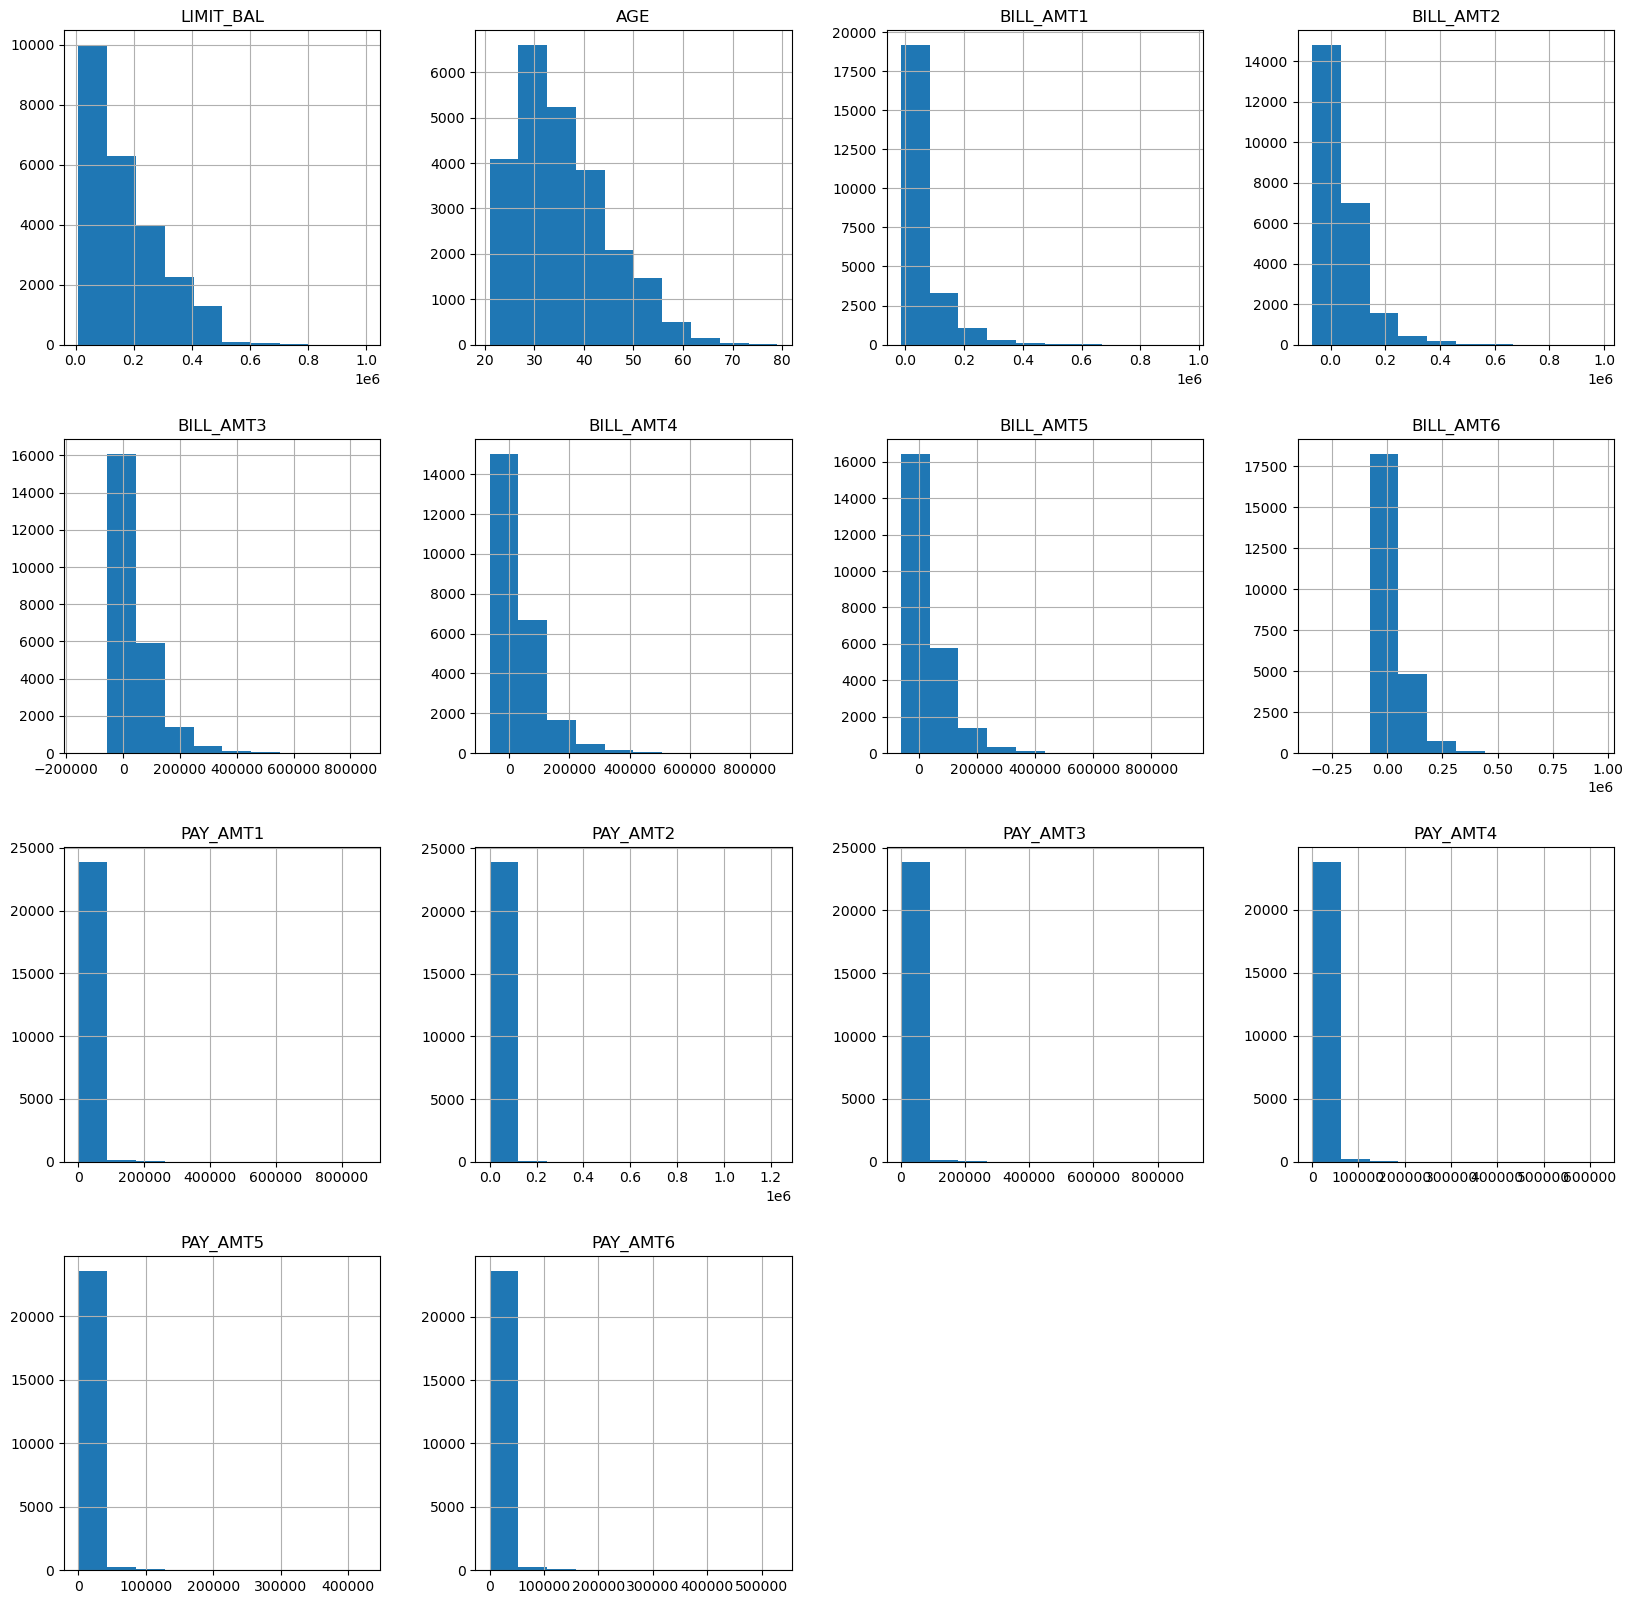

In [7]:
import matplotlib.pyplot as plt
import numpy as np
numeric_data=train_df[['LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2',
                       'BILL_AMT3', 'BILL_AMT4', 
                       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                       'PAY_AMT2', 'PAY_AMT3',
                       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
numeric_data.hist(figsize=(20,20));

1. 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4','BILL_AMT5', 'BILL_AMT6' have strong positive correlation with each other.
2. 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' have positive correlation with each other.

In [8]:
numeric_data.corr('spearman').style.background_gradient()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.185045,0.052238,0.044509,0.061552,0.075757,0.081559,0.090824,0.270676,0.280822,0.286323,0.283519,0.294502,0.316610
AGE,0.185045,1.000000,0.007471,0.007098,0.006361,0.001605,0.005877,0.005530,0.035641,0.043351,0.033097,0.043230,0.039578,0.040332
BILL_AMT1,0.052238,0.007471,1.000000,0.910785,0.857921,0.806439,0.765950,0.729307,0.503493,0.471869,0.443412,0.439299,0.423434,0.408397
BILL_AMT2,0.044509,0.007098,0.910785,1.000000,0.906951,0.848389,0.801622,0.761490,0.636183,0.495158,0.469246,0.457782,0.446900,0.425532
BILL_AMT3,0.061552,0.006361,0.857921,0.906951,1.000000,0.904053,0.848784,0.800594,0.550432,0.638172,0.494517,0.488459,0.476392,0.456064
BILL_AMT4,0.075757,0.001605,0.806439,0.848389,0.904053,1.000000,0.903874,0.846207,0.517508,0.556869,0.637250,0.510077,0.506268,0.480514
BILL_AMT5,0.081559,0.005877,0.765950,0.801622,0.848784,0.903874,1.000000,0.899805,0.485964,0.517364,0.552131,0.648896,0.526219,0.508499
BILL_AMT6,0.090824,0.005530,0.729307,0.761490,0.800594,0.846207,0.899805,1.000000,0.457129,0.485211,0.521612,0.572010,0.669533,0.530459
PAY_AMT1,0.270676,0.035641,0.503493,0.636183,0.550432,0.517508,0.485964,0.457129,1.000000,0.511524,0.524567,0.484567,0.469239,0.453987
PAY_AMT2,0.280822,0.043351,0.471869,0.495158,0.638172,0.556869,0.517364,0.485211,0.511524,1.000000,0.520023,0.519929,0.494314,0.491152


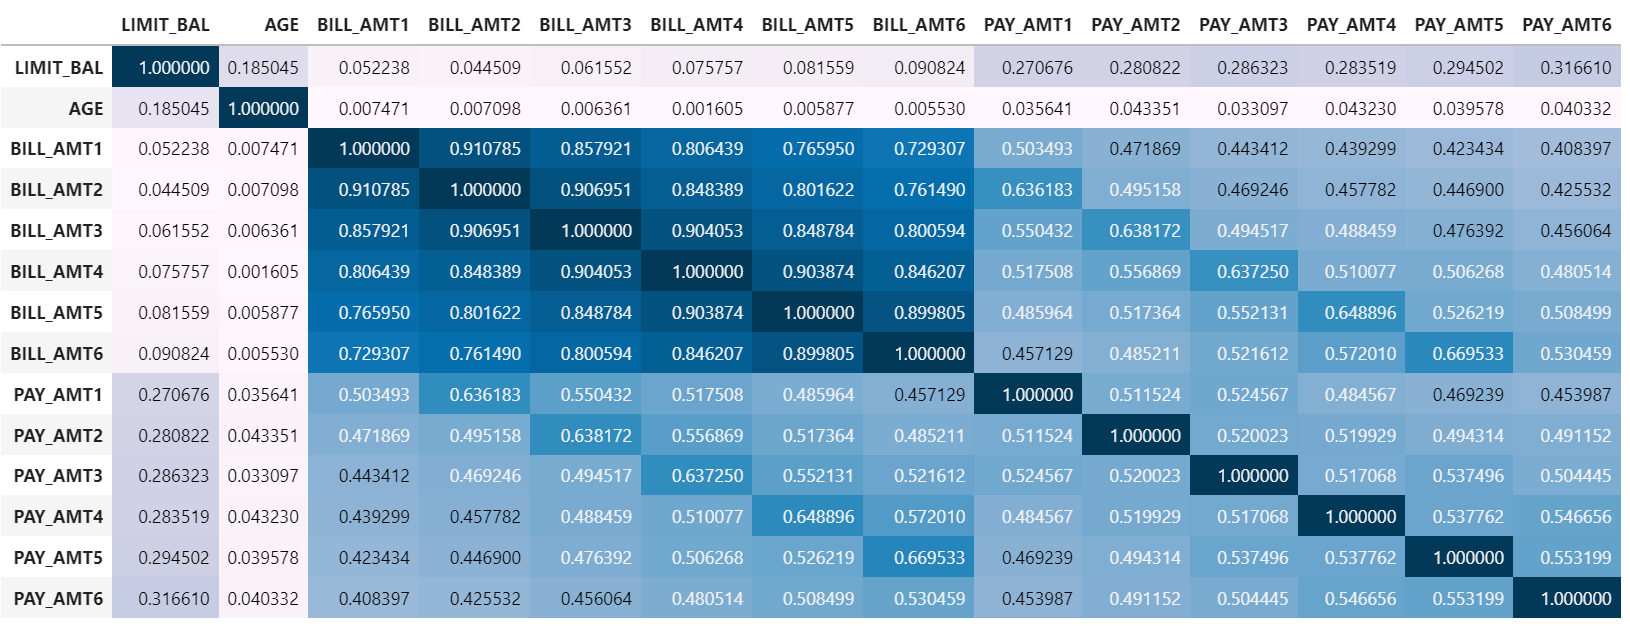

In [9]:
from IPython import display
display.Image("img/1.png")

1. 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4','BILL_AMT5', 'BILL_AMT6' have strong positive correlation with each other.
2. 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' have positive correlation with each other.

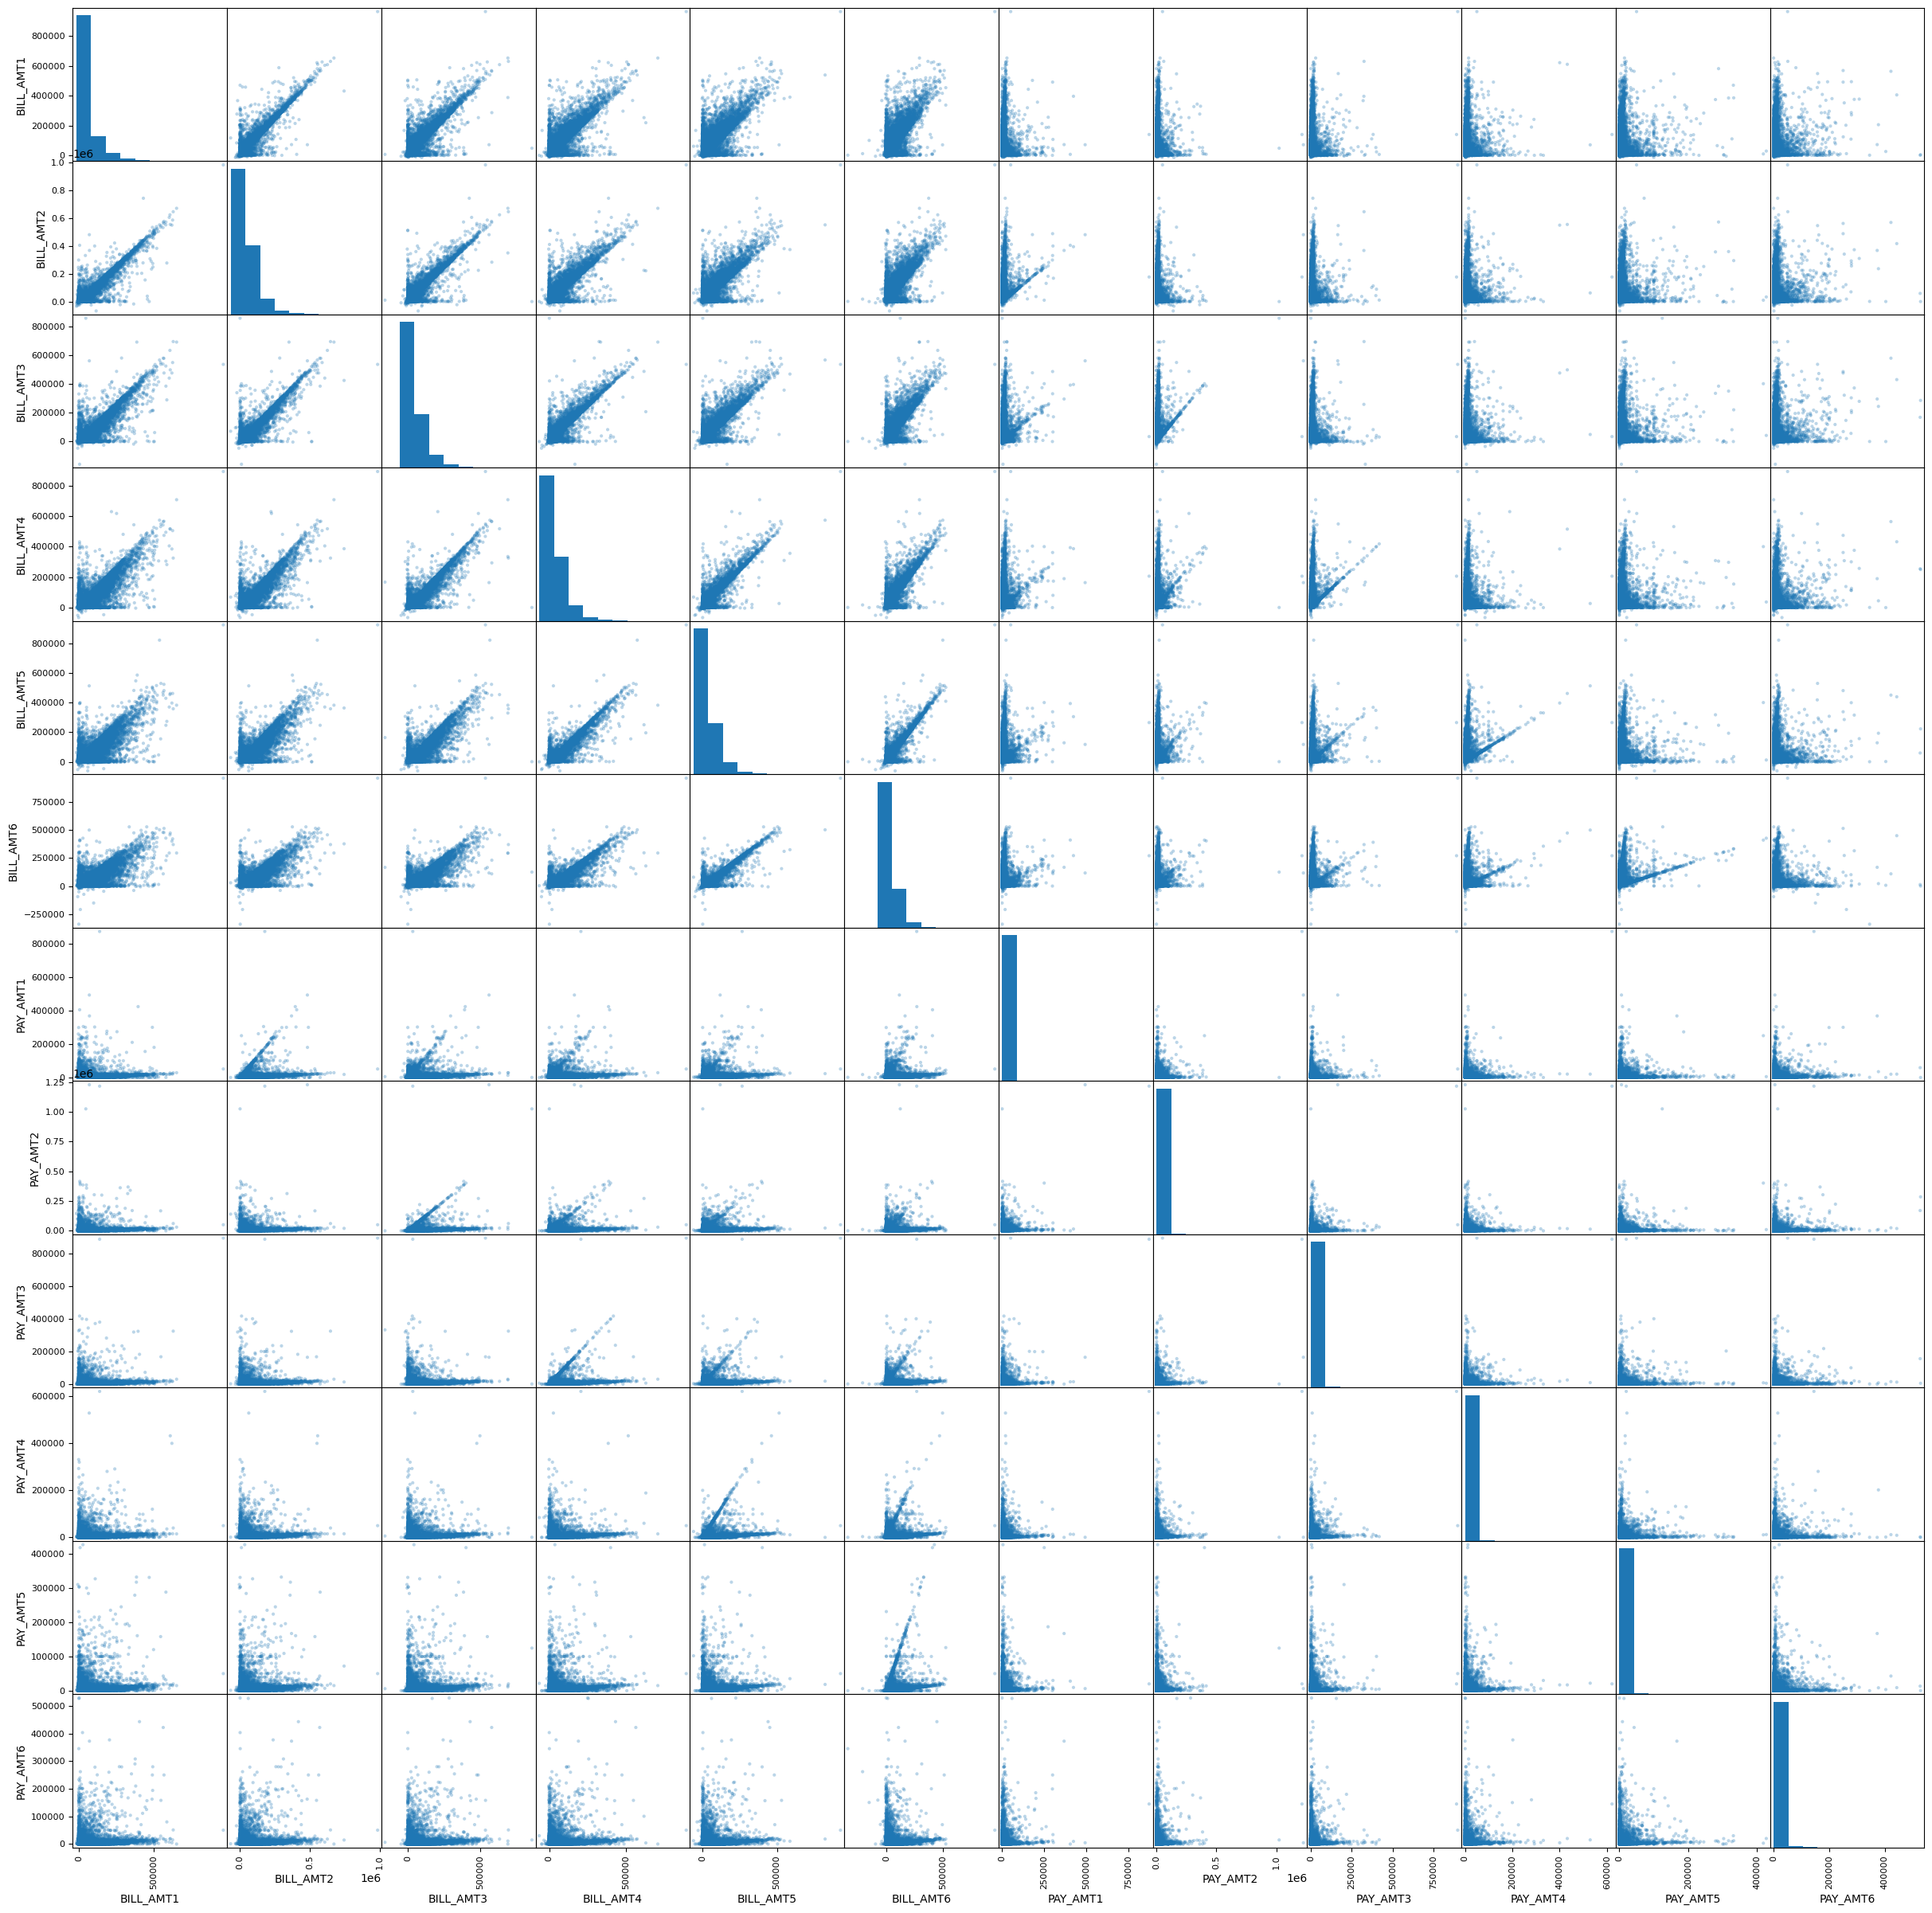

In [10]:
scatter_data=numeric_data[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 
                       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3',
                       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
# scatter_data
pd.plotting.scatter_matrix(scatter_data,alpha=.3,figsize=(30,30));

1. In Sex, 2(female) is the majority class which is 60.3% and class 1 is 40%.
2. In Education, 2(university) is the majority class.
3. In Marriage, 2(Single) is the majority class.
4. In PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6, 0(no payment delay) is the majority class.

In [11]:
train_df.SEX.value_counts(normalize=True)

2    0.603125
1    0.396875
Name: SEX, dtype: float64

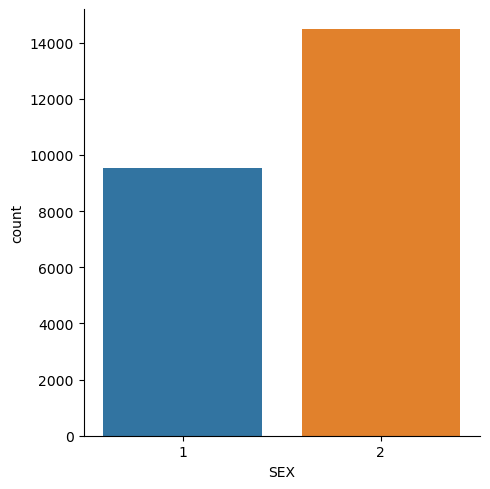

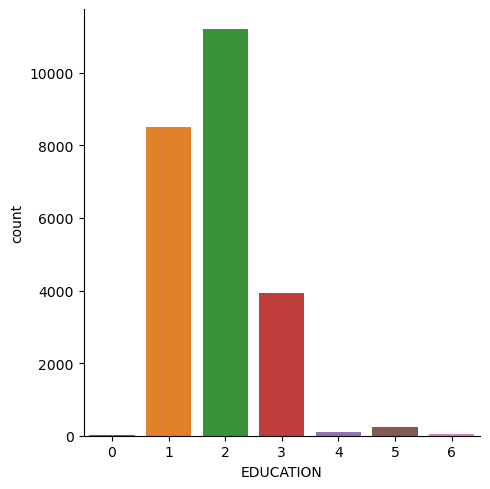

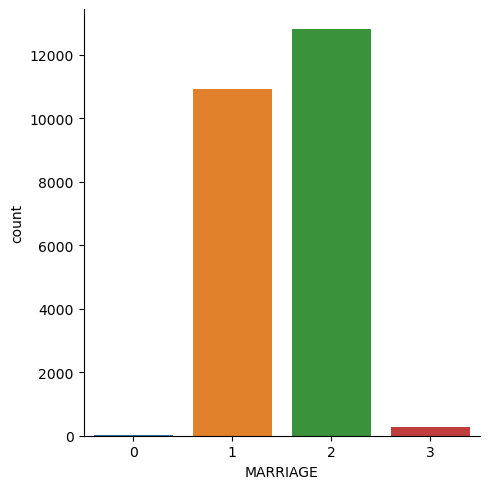

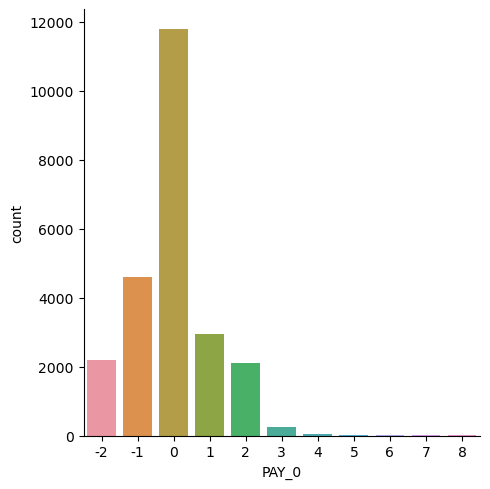

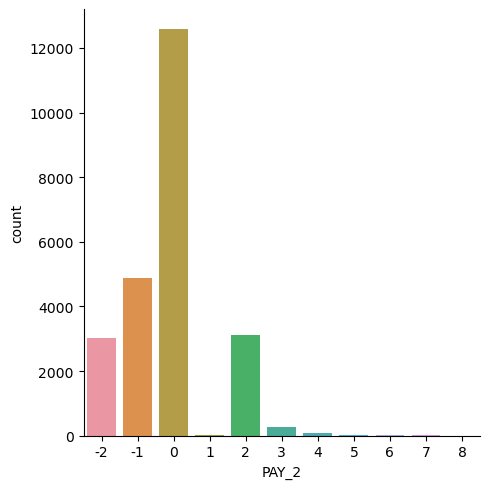

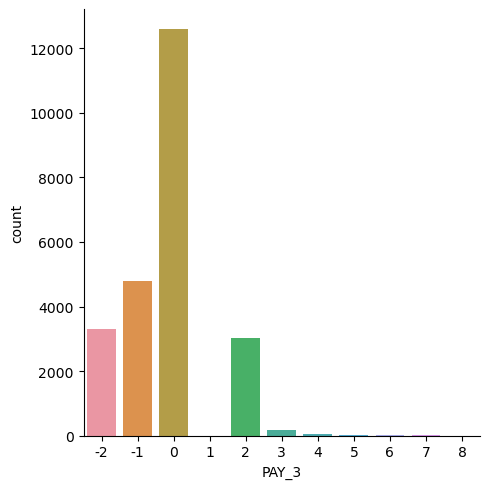

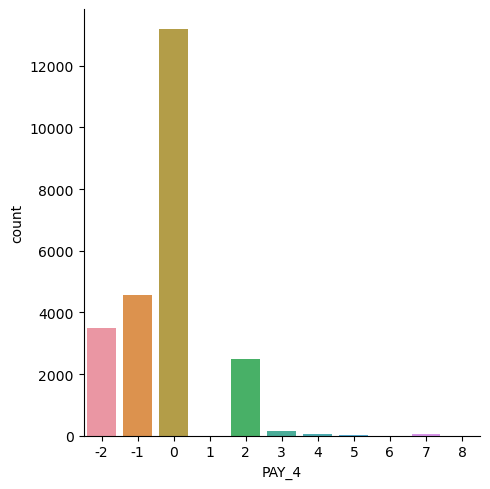

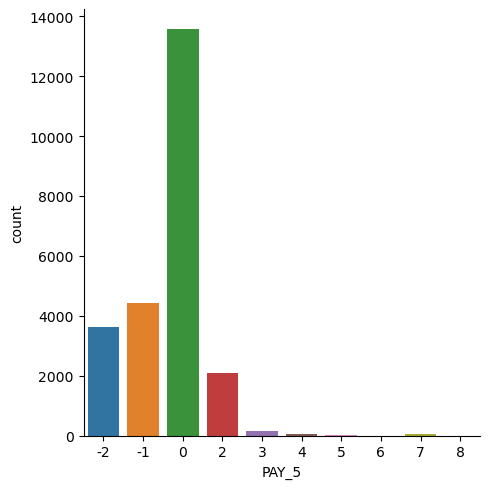

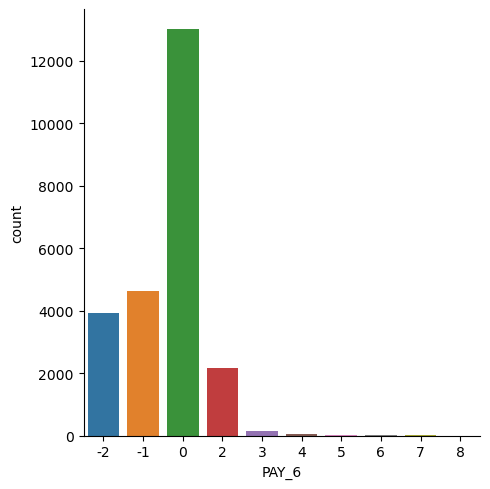

In [12]:
import seaborn as sns
import altair as alt
categorical_df = train_df[['SEX', 'EDUCATION', 'MARRIAGE',
                          'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                       'PAY_6']]
for i in categorical_df.columns:
    sns.catplot(data=categorical_df, x=i, kind="count")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5

* dropping unwanted data points.
    * -2 is a new data point in the PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6 for which the explaination is not given (this might be a typo or might have a completely different meaning to it).
    * As we have enough data for the prediction, we could drop them .
    * marriage column is also having few data points that are not needed for the prediction as ( 0's can be removed from the dataset)

In [13]:
data1 = data.query(
'(MARRIAGE ==0)or(EDUCATION==0)or(PAY_0==-2)or(PAY_2==-2)or(PAY_3==-2)or(PAY_4==-2)or(PAY_5==-2)or(PAY_6==-2)'
)
bad_list=data1.ID.to_list()
data=data[~data.ID.isin(bad_list)]

* We have removed unwanted rows from the data set and the resulting number of rows are :

In [14]:
data.shape

(23393, 25)

* I am using a average of the all the pays, because this gives us understanding of how a person has paid for the last few months.

In [15]:
data['avg_pay'] = (data['PAY_0'] +data['PAY_2']+data['PAY_3']+
                       data['PAY_4']+data['PAY_5']+data['PAY_6'])

In [16]:
train_df,test_df = train_test_split(data,test_size=0.2 ,random_state=123)
sorted(train_df.PAY_0.unique())

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

1. Education, PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6 features have hierarchy in it. Therefore, we are doing ordinal encoding.
2. 'LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','avg_pay' are numerical features. It needs to be scaled with standard scalar.
3. Sex has only two values. Therefore it can be treated as binary features. I am doing one hot encoding with drop as 'if_binary'.
4. Marriage is a categorical feature. Therefore it needs to be encoded using one hot encoding.

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

# Lists of feature names

ordinal_feature_ordering =[
     [1,2,3,4,5,6],
     [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
     [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
     [ -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
     [ -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
     [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
     [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
]
  
categorical_features = ['MARRIAGE']
ordinal_feature = ['EDUCATION','PAY_0','PAY_2', 'PAY_3', 
                        'PAY_4', 'PAY_5','PAY_6']

drop_features = ['ID']
numeric_features = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','avg_pay']
binary_features = ['SEX']

# Create the column transformer
preprocessor = make_column_transformer(
    (OrdinalEncoder(categories=ordinal_feature_ordering,
                    handle_unknown="error"),ordinal_feature),
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown="ignore", sparse=False),categorical_features),
    ("drop", drop_features),
    (OneHotEncoder(drop="if_binary", dtype=int),binary_features),
)

X_train = train_df.drop(columns=['default.payment.next.month'])
X_test = test_df.drop(columns=['default.payment.next.month'])
y_train = train_df['default.payment.next.month']
y_test = test_df['default.payment.next.month']

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

In [18]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

classification_metrics = ["accuracy", "precision", "recall", "f1"]
# The dummy model
dc = DummyClassifier()
# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results = {}
cross_val_results['dummy'] = pd.DataFrame(
    cross_validate(dc,X_train,y_train,return_train_score=True,
    scoring= classification_metrics)).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['dummy']

C:\Users\Jayathilaga\miniconda3\envs\573\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jayathilaga\miniconda3\envs\573\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jayathilaga\miniconda3\envs\573\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jayathilaga\miniconda3\envs\573\lib\site-packages\sklearn\met

,mean,std
fit_time,0.002,0.000
score_time,0.004,0.001
test_accuracy,0.771,0.000
train_accuracy,0.771,0.000
test_precision,0.000,0.000
train_precision,0.000,0.000
test_recall,0.000,0.000
train_recall,0.000,0.000
test_f1,0.000,0.000
train_f1,0.000,0.000


1. Dummy model has 77.1% accuracy which is the baseline score for this dataset.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

1. Logistic Regression has good accuracy around 81.2%. whereas precision is 69.6% and recall is 32.4% which is very low. Therefore we have Type 2 error (missed classification).
2. In order to overcome this, I have done hyper parameter tuning and got the best C as 0.023419595259846073 and best class_weight as 'balanced'. 
3. From Random search best hyperparameters, Logistic Regression is able to overcome type 2 error with little effect in precision.
4. Logistic regression with tuned hyperparameters have around 75.8% accuracy, 47.9% precision and 61.4% recall. which is comparatively better.

In [19]:
from sklearn.linear_model import LogisticRegression

# The logreg model pipeline
logreg = make_pipeline(preprocessor,LogisticRegression(random_state=123,
                                                       max_iter=1000))

# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results['logreg'] = pd.DataFrame(
    cross_validate(logreg,X_train,y_train,return_train_score=True,
    scoring=classification_metrics)).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['logreg']

,mean,std
fit_time,0.088,0.005
score_time,0.011,0.001
test_accuracy,0.812,0.007
train_accuracy,0.813,0.002
test_precision,0.696,0.028
train_precision,0.699,0.007
test_recall,0.324,0.021
train_recall,0.325,0.010
test_f1,0.442,0.025
train_f1,0.443,0.010


In [20]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_dist = {
    "logisticregression__C": loguniform(1e-3, 1e3),
    "logisticregression__class_weight": [None,"balanced"]
}

random_search = RandomizedSearchCV(
    logreg, param_distributions=param_dist, n_jobs=-1, cv=5, n_iter= 20,
    return_train_score=True,scoring='f1',random_state=123
)
random_search.fit(X_train, y_train)
best_parameters = random_search.best_params_
best_parameters

{'logisticregression__C': 0.023419595259846073,
 'logisticregression__class_weight': 'balanced'}

In [21]:
best_score = random_search.best_score_
best_score

0.5375249211964478

In [22]:
temp =  pd.DataFrame(random_search.cv_results_)[
   [ 'mean_fit_time','mean_score_time',
    'mean_test_score','mean_train_score','rank_test_score'
   ]
]
temp.columns = ['fit_time','score_time','test_score','train_score','rank_test_score']
temp.set_index("rank_test_score").sort_index().agg(['mean', 'std']).round(3).T

,mean,std
fit_time,0.463,0.120
score_time,0.036,0.006
test_score,0.494,0.048
train_score,0.497,0.049


In [23]:
# The logreg model pipeline
logreg = make_pipeline(preprocessor,
                       LogisticRegression(C=best_parameters['logisticregression__C'],
                                    random_state=123,max_iter=1000,
                                    class_weight=
                                best_parameters['logisticregression__class_weight']))

# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results['randomsearch'] = pd.DataFrame(
    cross_validate(logreg,X_train,y_train,return_train_score=True,
    scoring=classification_metrics)).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['randomsearch']

,mean,std
fit_time,0.064,0.003
score_time,0.011,0.001
test_accuracy,0.758,0.007
train_accuracy,0.761,0.006
test_precision,0.479,0.011
train_precision,0.483,0.009
test_recall,0.613,0.016
train_recall,0.618,0.004
test_f1,0.538,0.011
train_f1,0.542,0.005


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

1. We have tried the following three models:
    1. Random Forest classifier,
    2. XG boost classifier,
    3. Light GBM classifier.
2. In the three models, Light GBM classifier is performing better than XG boost and Random forest classifier with accuracy 81.8%, precision 65.9% and recall 42.4%.
3. On comparing with Logistic regression from random search hyperparameter tuning, Light GBM classifier is better based on accuracy and precision. But it does not have a good recall score.
4. We need to do hyperparameter tuning for lightGBM classifier inorder to bring the recall up.

In [24]:
from lightgbm.sklearn import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

pipe_rf = make_pipeline(
    preprocessor, 
    RandomForestClassifier(random_state=123))
pipe_xgb = make_pipeline(
    preprocessor, 
    XGBClassifier(random_state=123, 
                  eval_metric="logloss", 
                  verbosity=0)
)
pipe_lgbm = make_pipeline(
    preprocessor, 
    LGBMClassifier(random_state=123))
classifiers = {
    "random forest": pipe_rf,
    "XGBoost": pipe_xgb,
    "LightGBM": pipe_lgbm,
}

In [25]:
for (name, model) in classifiers.items():
    cross_val_results[name] = pd.DataFrame(cross_validate(
        model, X_train, y_train, return_train_score=True, 
        scoring=classification_metrics
    )).agg(['mean','std']).round(3).T
pd.concat(cross_val_results,axis=1)

dummy        logreg        randomsearch        random forest  \
                  mean    std   mean    std         mean    std          mean   
fit_time         0.002  0.000  0.088  0.005        0.064  0.003         3.338   
score_time       0.004  0.001  0.011  0.001        0.011  0.001         0.072   
test_accuracy    0.771  0.000  0.812  0.007        0.758  0.007         0.814   
train_accuracy   0.771  0.000  0.813  0.002        0.761  0.006         1.000   
test_precision   0.000  0.000  0.696  0.028        0.479  0.011         0.651   
train_precision  0.000  0.000  0.699  0.007        0.483  0.009         1.000   
test_recall      0.000  0.000  0.324  0.021        0.613  0.016         0.406   
train_recall     0.000  0.000  0.325  0.010        0.618  0.004         1.000   
test_f1          0.000  0.000  0.442  0.025        0.538  0.011         0.500   
train_f1         0.000  0.000  0.443  0.010        0.542  0.005         1.000   

                       XGBoost        LightGBM         
                   std    mean    std     mean    std  
fit_time         0.094   0.896  0.488    0.154  0.020  
score_time       0.004   0.021  0.002    0.020  0.001  
test_accuracy    0.006   0.811  0.007    0.818  0.005  
train_accuracy   0.000   0.921  0.005    0.861  0.001  
test_precision   0.020   0.634  0.022    0.659  0.018  
train_precision  0.000   0.930  0.010    0.799  0.007  
test_recall      0.024   0.412  0.021    0.424  0.015  
train_recall     0.000   0.710  0.013    0.525  0.006  
test_f1          0.023   0.500  0.020    0.516  0.015  
train_f1         0.000   0.805  0.012    0.633  0.004

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

1. We do not see any improvement based on the scoring metrics such as accuracy, precision, recall, f1 score.
2. Initially there were 26 features after preprocessing.
3. On recursive feature elimination CV, we get 16 features. 
4. Which also provides a same results. no improvement in the model.

In [26]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge

pipe_rfecv = make_pipeline(preprocessor, 
                                 RFECV(Ridge(), cv=10), 
                                 LGBMClassifier(random_state=123))
cross_val_results['rfecv'] = pd.DataFrame(
    cross_validate(pipe_rfecv,X_train,y_train,return_train_score=True,
    scoring=classification_metrics)).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['rfecv']

,mean,std
fit_time,0.964,0.072
score_time,0.021,0.001
test_accuracy,0.818,0.008
train_accuracy,0.847,0.004
test_precision,0.666,0.027
train_precision,0.765,0.010
test_recall,0.418,0.019
train_recall,0.483,0.014
test_f1,0.513,0.022
train_f1,0.592,0.014


In [27]:
pipe_rfecv.fit(X_train,y_train)
rfecv_fs = pipe_rfecv.named_steps["rfecv"]
rfecv_fs.n_features_in_

26

In [28]:
pipe_rfecv.named_steps['rfecv'].n_features_
# sum(pipe_rfecv.named_steps["rfecv"].support_.tolist())

16

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

1. On hyper-parameter tuning, we see an increase in the expected scoring metrics such as 82% accuracy, 66.5% precision, 43.4% recall and 52.5% f1 score.
2. As we can see below, that on hyper parameter tuning the best parameters are as follows:
    1. 'lgbmclassifier__learning_rate': 0.1,
    2. 'lgbmclassifier__max_depth': 10,
    3. 'lgbmclassifier__num_leaves': 400,
    4. 'lgbmclassifier__reg_alpha': 14,
    5. 'lgbmclassifier__reg_lambda': 2

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "lgbmclassifier__learning_rate": [0.1,0.3],
    "lgbmclassifier__max_depth": [8,10,12],
    "lgbmclassifier__num_leaves":[30,400],
    "lgbmclassifier__reg_alpha":[2,12,14],
    "lgbmclassifier__reg_lambda":[2,5,14]
}

grid_search = GridSearchCV(
    pipe_lgbm, param_grid, cv=5, n_jobs=-1,scoring='f1', return_train_score=True
)
grid_search.fit(X_train, y_train)
results = pd.DataFrame(grid_search.cv_results_)
best_param = grid_search.best_params_
best_param 

{'lgbmclassifier__learning_rate': 0.1,
 'lgbmclassifier__max_depth': 10,
 'lgbmclassifier__num_leaves': 400,
 'lgbmclassifier__reg_alpha': 14,
 'lgbmclassifier__reg_lambda': 2}

In [30]:
grid_search.best_score_

0.5252636047083213

In [31]:
pipe_lgbm_grid = make_pipeline(
    preprocessor, 
    LGBMClassifier(learning_rate =best_param['lgbmclassifier__learning_rate'],
                   max_depth=best_param['lgbmclassifier__max_depth'] ,
                   num_leaves=best_param['lgbmclassifier__num_leaves'],
                   reg_alpha=best_param['lgbmclassifier__reg_alpha'],
                   reg_lambda=best_param['lgbmclassifier__reg_lambda'],
                   random_state=123))
cross_val_results['LGBM_grid_search'] = pd.DataFrame(cross_validate(
        pipe_lgbm_grid, X_train, y_train, return_train_score=True, 
        scoring=classification_metrics
    )).agg(['mean','std']).round(3).T
pd.concat(cross_val_results,axis=1)

dummy        logreg        randomsearch        random forest  \
                  mean    std   mean    std         mean    std          mean   
fit_time         0.002  0.000  0.088  0.005        0.064  0.003         3.338   
score_time       0.004  0.001  0.011  0.001        0.011  0.001         0.072   
test_accuracy    0.771  0.000  0.812  0.007        0.758  0.007         0.814   
train_accuracy   0.771  0.000  0.813  0.002        0.761  0.006         1.000   
test_precision   0.000  0.000  0.696  0.028        0.479  0.011         0.651   
train_precision  0.000  0.000  0.699  0.007        0.483  0.009         1.000   
test_recall      0.000  0.000  0.324  0.021        0.613  0.016         0.406   
train_recall     0.000  0.000  0.325  0.010        0.618  0.004         1.000   
test_f1          0.000  0.000  0.442  0.025        0.538  0.011         0.500   
train_f1         0.000  0.000  0.443  0.010        0.542  0.005         1.000   

                       XGBoost        LightGBM         rfecv         \
                   std    mean    std     mean    std   mean    std   
fit_time         0.094   0.896  0.488    0.154  0.020  0.964  0.072   
score_time       0.004   0.021  0.002    0.020  0.001  0.021  0.001   
test_accuracy    0.006   0.811  0.007    0.818  0.005  0.818  0.008   
train_accuracy   0.000   0.921  0.005    0.861  0.001  0.847  0.004   
test_precision   0.020   0.634  0.022    0.659  0.018  0.666  0.027   
train_precision  0.000   0.930  0.010    0.799  0.007  0.765  0.010   
test_recall      0.024   0.412  0.021    0.424  0.015  0.418  0.019   
train_recall     0.000   0.710  0.013    0.525  0.006  0.483  0.014   
test_f1          0.023   0.500  0.020    0.516  0.015  0.513  0.022   
train_f1         0.000   0.805  0.012    0.633  0.004  0.592  0.014   

                LGBM_grid_search         
                            mean    std  
fit_time                   0.274  0.064  
score_time                 0.024  0.005  
test_accuracy              0.820  0.007  
train_accuracy             0.838  0.003  
test_precision             0.665  0.022  
train_precision            0.726  0.009  
test_recall                0.434  0.021  
train_recall               0.474  0.007  
test_f1                    0.525  0.021  
train_f1                   0.573  0.008

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

1. SHAP:
    1. Using shape, we were able to generate train data of (18714, 26) as shape and test data of (4679, 26) shape
2. eli5:
    * avg_pay and pay_0 has highest weights as per eli5 method.
    * pay_0 has also highest weight of 0.4262 on predicting the target. As the pay_0 is nothing but whether the client has paid recently or not. which is of course the most important in predicting whether the client will pay next month or not.
    * avg_pay has second highest weight of 0.2682 being most important feature on the target whether client will make payment or not.

In [32]:
ohe_feature_names = (
    pipe_lgbm_grid.named_steps["columntransformer"]
    .named_transformers_["onehotencoder-1"]
    .get_feature_names_out()
    .tolist()
)
ohe_feature_names
feature_names = (
    ordinal_feature + numeric_features + 
    ohe_feature_names + binary_features 
)
feature_namesX_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)

In [33]:
import shap
pipe_lgbm_grid.fit(X_train,y_train)
X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)
lgbm_explainer = shap.TreeExplainer(
    pipe_lgbm_grid.named_steps["lgbmclassifier"])
train_lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc)
train_lgbm_shap_values[1].shape

C:\Users\Jayathilaga\miniconda3\envs\573\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


(18714, 26)

In [34]:
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)
test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_enc)
test_lgbm_shap_values[1].shape

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


(4679, 26)

In [35]:
import eli5
pipe_lgbm_grid.fit(X_train, y_train)
eli5.explain_weights(
    pipe_lgbm_grid.named_steps["lgbmclassifier"], feature_names=feature_names
)

Weight,Feature
0.4262,PAY_0
0.2682,avg_pay
0.0403,BILL_AMT1
0.0349,LIMIT_BAL
0.0321,PAY_AMT2
0.0221,PAY_AMT1
0.0200,AGE
0.0190,PAY_AMT4
0.0189,PAY_AMT3
0.0183,PAY_AMT6


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

1. My best performing model is Light GBM with grid search hyperparameter tuning.
2. The following are the reported test scores. 
3. The reported test scores agree with the validation scores we got earlier.
4. I trust the results, as the scores are consistent for all the cross validation scores generated.
5. I did not have issue with optimization bias, as I am able to identify the trade off between type 1 and type 2 error without effecting the accuracy of the model.

SHAP plot:
1. As we know the two important features as shown in eli5,
    * avg_pay - 0.429388
    * PAY_0 - 0.355217
2. When pay_0 is 3 then the probability of target = 1 falls 0.62 and some importance is given to avg_pay and limit_bal. That client will pay next month.
3. when pay_0 is 1 then probability of target =1 falls low -2.11 and predicting the client will not pay next month.

In [36]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Best model: Light GBM with grid search hyperparameter tuning")
print("Accuracy: ",pipe_lgbm_grid.score(X_test,y_test))
print("F1 score: ",f1_score(y_test,pipe_lgbm_grid.predict(X_test)))
print("Precision score: ",precision_score(y_test,pipe_lgbm_grid.predict(X_test)))
print("Recall score: ",recall_score(y_test,pipe_lgbm_grid.predict(X_test)))

Best model: Light GBM with grid search hyperparameter tuning
Accuracy:  0.8262449241290875
F1 score:  0.5554948059048661
Precision score:  0.6874154262516915
Recall score:  0.46605504587155966


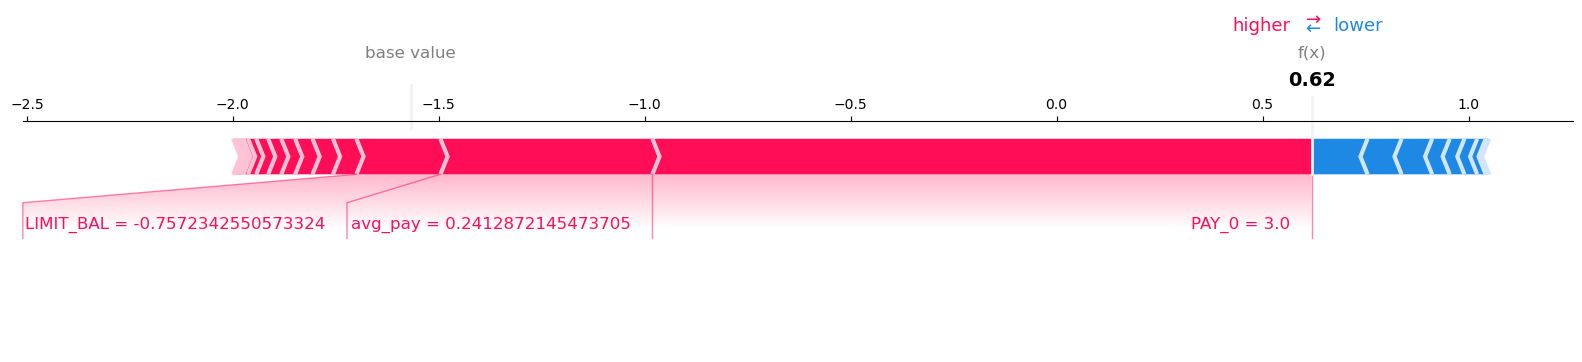

In [37]:
y_test_reset = y_test.reset_index(drop=True)
n_1 = y_test_reset[y_test_reset == 1].index.tolist()
n_0 = y_test_reset[y_test_reset == 0].index.tolist()

n_1_index = n_1[10]
n_0_index = n_0[10]

shap.force_plot(
    lgbm_explainer.expected_value[1],  
    test_lgbm_shap_values[1][n_1_index, :], 
    X_test_enc.iloc[n_1_index, :],  
    matplotlib=True,
)

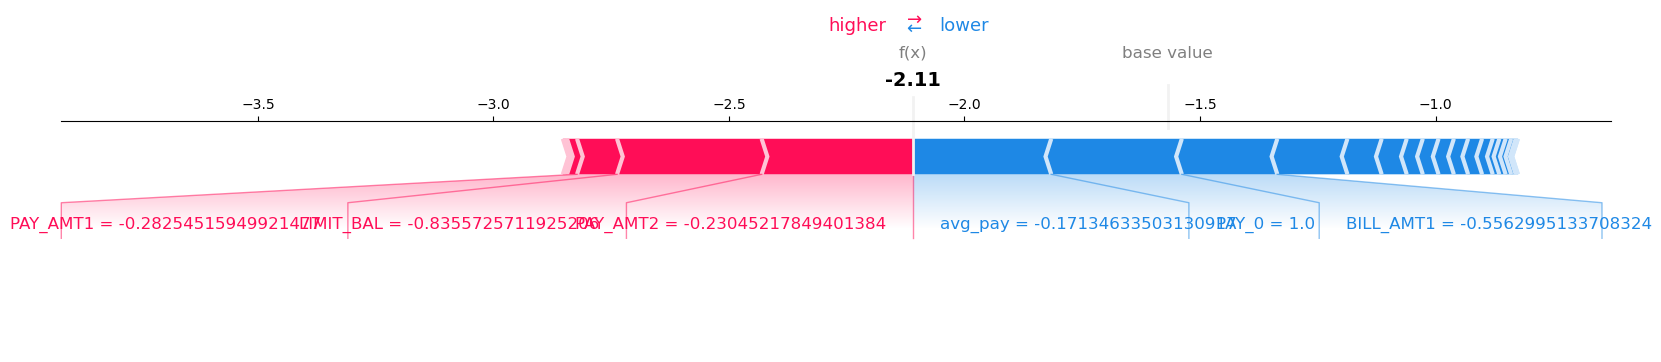

In [38]:
shap.force_plot(
    lgbm_explainer.expected_value[1],  
    test_lgbm_shap_values[1][n_0_index, :], 
    X_test_enc.iloc[n_0_index, :],  
    matplotlib=True,
)

In [39]:
values = np.abs(train_lgbm_shap_values[1]).mean(
    0
)  
# mean of shapely values in each column
pd.DataFrame(data=values, index=feature_names, columns=["SHAP"]).sort_values(
    by="SHAP", ascending=False
)[:10]

,SHAP
avg_pay,0.429388
PAY_0,0.355217
LIMIT_BAL,0.265225
BILL_AMT1,0.194933
PAY_AMT2,0.129863
PAY_AMT1,0.113624
PAY_AMT3,0.066885
SEX,0.057886
MARRIAGE_2,0.057548
BILL_AMT4,0.053341


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

1. From the table below, we can conclude the following.
    * It is visible that the data set is imbalanced, and after balancing we are able to solve type 2 error with a little effect type 1 error.
    * light GBM model with grid search hyperparameter tuning is the best fit for the default of credit card clients dataset.
    * We tuned the model so that we need to improve recall score.
2. Other ideas:
    * Bucketing age as one of the parameter to build the model.
    * creating new feature on combining age and marriage column.
    * smote algorithm for oversampling instead of class_weights.
3. Final test score using the light GBM with best hyperparameters are as follows:
    * Best model: Light GBM with grid search hyperparameter tuning:
    
                1. Accuracy:  0.8262449241290875
                2. F1 score:  0.5554948059048661
                3. Precision score:  0.6874154262516915
                4. Recall score:  0.46605504587155966

In [40]:
pd.concat(cross_val_results,axis=1)

dummy        logreg        randomsearch        random forest  \
                  mean    std   mean    std         mean    std          mean   
fit_time         0.002  0.000  0.088  0.005        0.064  0.003         3.338   
score_time       0.004  0.001  0.011  0.001        0.011  0.001         0.072   
test_accuracy    0.771  0.000  0.812  0.007        0.758  0.007         0.814   
train_accuracy   0.771  0.000  0.813  0.002        0.761  0.006         1.000   
test_precision   0.000  0.000  0.696  0.028        0.479  0.011         0.651   
train_precision  0.000  0.000  0.699  0.007        0.483  0.009         1.000   
test_recall      0.000  0.000  0.324  0.021        0.613  0.016         0.406   
train_recall     0.000  0.000  0.325  0.010        0.618  0.004         1.000   
test_f1          0.000  0.000  0.442  0.025        0.538  0.011         0.500   
train_f1         0.000  0.000  0.443  0.010        0.542  0.005         1.000   

                       XGBoost        LightGBM         rfecv         \
                   std    mean    std     mean    std   mean    std   
fit_time         0.094   0.896  0.488    0.154  0.020  0.964  0.072   
score_time       0.004   0.021  0.002    0.020  0.001  0.021  0.001   
test_accuracy    0.006   0.811  0.007    0.818  0.005  0.818  0.008   
train_accuracy   0.000   0.921  0.005    0.861  0.001  0.847  0.004   
test_precision   0.020   0.634  0.022    0.659  0.018  0.666  0.027   
train_precision  0.000   0.930  0.010    0.799  0.007  0.765  0.010   
test_recall      0.024   0.412  0.021    0.424  0.015  0.418  0.019   
train_recall     0.000   0.710  0.013    0.525  0.006  0.483  0.014   
test_f1          0.023   0.500  0.020    0.516  0.015  0.513  0.022   
train_f1         0.000   0.805  0.012    0.633  0.004  0.592  0.014   

                LGBM_grid_search         
                            mean    std  
fit_time                   0.274  0.064  
score_time                 0.024  0.005  
test_accuracy              0.820  0.007  
train_accuracy             0.838  0.003  
test_precision             0.665  0.022  
train_precision            0.726  0.009  
test_recall                0.434  0.021  
train_recall               0.474  0.007  
test_f1                    0.525  0.021  
train_f1                   0.573  0.008

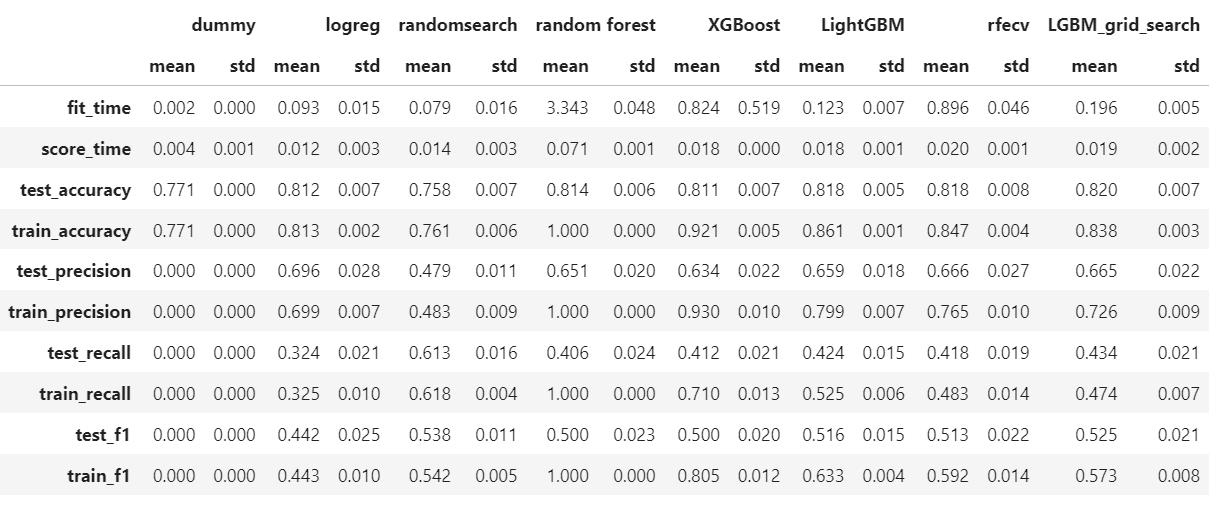

In [41]:
display.Image("img/2.png")

In [42]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Best model: Light GBM with grid search hyperparameter tuning")
print("Accuracy: ",pipe_lgbm_grid.score(X_test,y_test))
print("F1 score: ",f1_score(y_test,pipe_lgbm_grid.predict(X_test)))
print("Precision score: ",precision_score(y_test,pipe_lgbm_grid.predict(X_test)))
print("Recall score: ",recall_score(y_test,pipe_lgbm_grid.predict(X_test)))

Best model: Light GBM with grid search hyperparameter tuning
Accuracy:  0.8262449241290875
F1 score:  0.5554948059048661
Precision score:  0.6874154262516915
Recall score:  0.46605504587155966


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**
- In 522 you learned how build a reproducible data analysis pipeline. Convert this notebook into scripts and create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

1. No idea about creating data analysis pipeline.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

1. It was helpful in understanding pipeline better
2. Learned new ensembling algorithms which I have never used before.

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans: 45 hours

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

##Ans: The lab was too long. It had questions which is not fair for CL students. question 14 though it is optional. I feel MDS-V student may be able to do it but CL student have no idea on where to begin. Hopefully there is another set of question for CL students to compensate this portion.